
cool tutorial about continuously updating app
https://www.youtube.com/watch?v=JQ7QP5rPvjU


In [ ]:
try:
    # Python2
    import Tkinter as tk
except ImportError:
    # Python3
    import tkinter as tk
    
def select():
    sf = "value is %s" % var.get()
    root.title(sf)
    # optional
    color = var.get()
    root['bg'] = color
    
root = tk.Tk()

# use width x height + x_offset + y_offset (no spaces!)
root.geometry("%dx%d+%d+%d" % (530, 200, 200, 100))
root.title("tk.Optionmenu as combobox")
var = tk.StringVar(root)

# initial value
var.set('red')
choices = ['red', 'green', 'blue', 'yellow','white', 'magenta']
option = tk.OptionMenu(root, var, *choices)
option.pack(side='left', padx=10, pady=10)
button = tk.Button(root, text="Colorize, bitches.", command=select)
button.pack(side='left', padx=20, pady=10)

root.mainloop()

In [ ]:
import Tkinter
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

class App:
    def __init__(self, master):
        # Create a container
        frame = Tkinter.Frame(master)
        
        # Create 2 buttons
        self.button_left = Tkinter.Button(frame,text="< Decrease Slope",
                                        command=self.decrease)
        self.button_left.pack(side="left")
        self.button_right = Tkinter.Button(frame,text="Increase Slope >",
                                        command=self.increase)
        self.button_right.pack(side="left")

        fig = Figure()
        ax = fig.add_subplot(111)
        self.line, = ax.plot(range(10))

        self.canvas = FigureCanvasTkAgg(fig,master=master)
        self.canvas.show()
        self.canvas.get_tk_widget().pack(side='top', fill='both', expand=1)
        frame.pack()

    def decrease(self):
        x, y = self.line.get_data()
        self.line.set_ydata(y - 0.2 * x )
        self.canvas.draw()

    def increase(self):
        x, y = self.line.get_data()
        self.line.set_ydata(y + 0.2 * x)
        self.canvas.draw()

root = Tkinter.Tk()
app = App(root)
root.mainloop()

In [ ]:
import Tkinter
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from math import cos, sin

class App:
    def __init__(self, master):
        # Create a container
        frame = Tkinter.Frame(master)
        # Create 2 buttons
        self.button_left = Tkinter.Button(frame,text="< Decrease Slope",
                                        command=self.decrease)
        self.button_left.pack(side="left")
        self.button_right = Tkinter.Button(frame,text="Increase Slope >",
                                        command=self.increase)
        self.button_right.pack(side="left")

        fig = Figure()
        ax = fig.add_subplot(111)
        self.line, = ax.plot([x/0.5 for x in range(20)])
        self.canvas = FigureCanvasTkAgg(fig,master=master)
        self.canvas.show()
        self.canvas.get_tk_widget().pack(side='top', fill='both', expand=1)
        frame.pack()

    def decrease(self):
        x, y = self.line.get_data()
        self.line.set_ydata(y+[cos(xx) for xx in x])
        self.canvas.draw()

    def increase(self):
        x, y = self.line.get_data()
        self.line.set_ydata(y + 0.2 * x)
        self.canvas.draw()

root = Tkinter.Tk()
app = App(root)
root.mainloop()

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "distributions")))

In [11]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

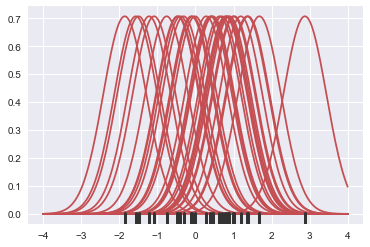

In [12]:
kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

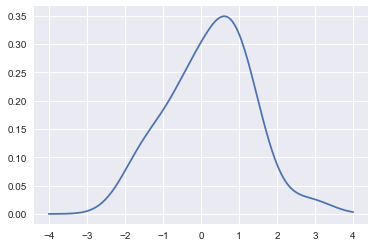

In [15]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density)